<a href="https://colab.research.google.com/github/JH-lee95/DataAnalysis/blob/master/fakenews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [40.7 kB]
Get:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRe

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
from konlpy.tag import Mecab
import numpy as np
import pandas as pd


In [ ]:
# Setting seed
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
news_train = pd.read_csv("./drive/MyDrive/Colab Notebooks/NhInvest/news_train.csv")
news_test=pd.read_csv("./drive/MyDrive/Colab Notebooks/NhInvest/news_test.csv")

# 1. EDA

In [ ]:
news_train.head()

,n_id,date,title,content,ord,info
0,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,[이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도,1,0
1,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",2,1
2,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시",3,1
3,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,종합 경제정보 미디어 이데일리 - 무단전재 & 재배포 금지,4,0
4,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",전국적인 소비 붐 조성에 기여할 예정,1,0


In [ ]:
news_test.head()

,n_id,date,title,content,ord,id
0,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",마이크로 LED TV 장비 양산 돌입- 전방업체 투자 확대로 본업도 호조연일 '신고가',1,NEWS00237_1
1,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",[이데일리 김대웅 기자] 반도체 장비 업체 코세스(089890)의 기술력이 마이크로...,2,NEWS00237_2
2,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",최근 대형 업체들과 거래를 맺고 관련 장비들의 양산에 돌입하면서 주가도 연일 신고가...,3,NEWS00237_3
3,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",TV를 필두로 올해부터 마이크로 LED의 시대가 본격적으로 개화할 것으로 예상되면서...,4,NEWS00237_4
4,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대","코세스는 반도체 장비를 제조, 판매하는 업체로 지난 2006년 11월 코스닥 시장에...",5,NEWS00237_5


In [ ]:
news_train.isnull().sum()

n_id       0
date       0
title      0
content    0
ord        0
info       0
dtype: int64

In [ ]:
news_test.isnull().sum()

n_id       0
date       0
title      0
content    0
ord        0
id         0
dtype: int64

In [ ]:
news_train["info"].value_counts()

0    71813
1    46932
Name: info, dtype: int64

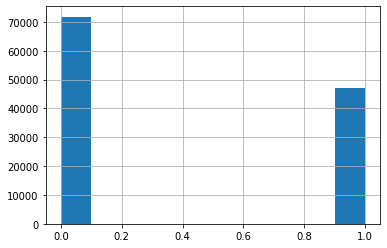

In [ ]:
news_train["info"].hist()

In [ ]:
#가짜 뉴스만 확인 

news_train[news_train["info"]==1][:30]

,n_id,date,title,content,ord,info
1,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",2,1
2,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시",3,1
16,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참","""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",13,1
17,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참","하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시",14,1
42,NEWS07691,20200518,13년만에 늦깎이 개발 '양주 회천' 봄볕 드나,"""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",24,1
43,NEWS07691,20200518,13년만에 늦깎이 개발 '양주 회천' 봄볕 드나,"하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시",25,1
57,NEWS00695,20200522,"BMW코리아, 온라인 한정판 `M340i 퍼스트 에디션` 출시","""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",13,1
58,NEWS00695,20200522,"BMW코리아, 온라인 한정판 `M340i 퍼스트 에디션` 출시","하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시",14,1
60,NEWS07957,20200414,"온라인 결제株, 코로나19 사태로 최대 수혜를?",온라인결제 관련주가 코로나19 사태의 최대 수혜주라는 평가가 나왔다. 언택트 소비 ...,1,1
61,NEWS07957,20200414,"온라인 결제株, 코로나19 사태로 최대 수혜를?","한편, 스탁론에 대한 관심이 날로 높아지고 있다. 모처럼 잡은 투자기회를 놓치지 않...",2,1


In [ ]:
#진짜 뉴스만 확인

news_train[news_train["info"]==0][:30]

,n_id,date,title,content,ord,info
0,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,[이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도,1,0
3,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,종합 경제정보 미디어 이데일리 - 무단전재 & 재배포 금지,4,0
4,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",전국적인 소비 붐 조성에 기여할 예정,1,0
5,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",[이데일리 권오석 기자] 중소벤처기업부(이하 중기부)는 대한민국 동행세일에 7개 T...,2,0
6,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참","대한민국 동행세일은 라이브 커머스, 언택트 콘서트, O2O 행사 연계 등 비대면이라...",3,0
7,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참","6개 권역에서의 현장행사와 온·오프라인 판촉, TV홈쇼핑 등 연계행사를 통해 소비심...",4,0
8,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",이번 동행세일에서는 롯데·공영·CJ·현대·GS·NS·홈앤쇼핑 등 7개 TV 홈쇼핑사...,5,0
9,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참","동행세일 기간 중 홈쇼핑사에서는 판매방송 사이에 영상을 노출하는 방식(SB, sta...",6,0
10,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참","첫 방송으로 6월 26일부터 공영홈쇼핑은 마스크, 식기세트 등 생활용품과 신선식품 ...",7,0
11,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",특히 롯데홈쇼핑은 6월 26일 부산 벡스코에서 현장 이원 생방송을 통해 동행세일 현...,8,0


가짜 뉴스는 기사 제목과 상관없는 광고성 내용을 담고 있는 것을 볼 수 있다.

# 2. 텍스트 전처리

In [ ]:
# def preprocessing(contents):

#   # 허용하는 품사
#   pos_list=["SL","SN","NNG","NNP","NNB","NR","NP","VV","VA","VX","IC"]

#   tokenizer=Mecab()

#   token_list=[]

#   for content in contents:
#     token=tokenizer.pos(content)

#     for t in token:

#       if t[1] in pos_list:
#         token_list.append(t[0])

#   return token_list,tokenizer



In [ ]:
import re

In [ ]:
def text_preprocessing(text_list):
    
    stopwords = ['을', '를', '이', '가', '은', '는', 'null'] #불용어 설정
    tokenizer = Mecab() #형태소 분석기 
    token_list = []
    
    for text in text_list:
        txt = re.sub('[^가-힣a-z]', ' ', text) #한글과 영어 소문자만 남기고 다른 글자 모두 제거
        token = tokenizer.morphs(txt) #형태소 분석
        token = [t for t in token if t not in stopwords or type(t) != float] #형태소 분석 결과 중 stopwords에 해당하지 않는 것만 추출
        token_list.append(token)
        
    return token_list, tokenizer

#형태소 분석기를 따로 저장한 이유는 후에 test 데이터 전처리를 진행할 때 이용해야 되기 때문입니다. 
news_train['new_article'], okt = text_preprocessing(news_train['content']) 